# Plot drone

## Loading modules

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
linearized_inputs = {
    'z': 'f',
    'phi': 'm_x',
    'theta': 'm_y',
    'psi': 'm_z'
}

var_labels = {
    'x': 'x', 'y': 'y', 'z':'z', 'theta': '\\theta', 'phi': '\\phi', 'psi': '\\psi',
    'f': 'f', 'm_x': 'm_x', 'm_y': 'm_y', 'm_z': 'm_z'
}
output_dir = 'plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

## Functions

In [6]:
def time_plot(variables, sim_out, title:str=None, filename:str=None):
    fig, axes = plt.subplots(len(variables),1,figsize=(19.20,10.80))
    for i, zipped in enumerate(zip(axes, variables)):
        lines = list()
        ax, var = zipped
        ax.grid()
        base_name = var.replace('d', '')
        base_label = var.replace(base_name, var_labels[base_name])
        ylabel = f'${base_label}$'
        lines += ax.plot(sim_out['t'], sim_out[var], label=f'${base_label}$', color='C0')
        ref_name = f'ref_{var}'
        if ref_name in sim_out.columns:
            r_label = f'$r_{{{base_label}}}$'
            lines += ax.plot(sim_out['t'], sim_out[ref_name], label=r_label, linestyle='--', color='k')
            ylabel += f', {r_label}'
        
        error_name = f'e_{var}'
        if error_name in sim_out.columns:
            error_label = f'$e_{{{base_label}}}$'
            lines += ax.plot(sim_out['t'], sim_out[error_name], label=error_label, linestyle='--', color='C1')
            ylabel += f', {error_label}'

        input_name = f'u_{var}'
        if input_name in sim_out.columns:
            input_label = f'$u_{{{base_label}}}$'
            lines += ax.plot(sim_out['t'], sim_out[input_name], label=input_label, linestyle='--', color='C2')
            # ylabel += f', ${input_name}$' if var == 'z' else f', $u_{{\\{var}}}$'
            ylabel += f', {input_label}'
        
        if var in linearized_inputs.keys():
            twinx = ax.twinx()
            input_name = linearized_inputs[var]
            input_label = f'${var_labels[input_name]}$'
            lines += twinx.plot(sim_out['t'], sim_out[input_name], label=input_label, linestyle='--', color='C3')
            twinx.set_ylabel(input_label)
        
        labels = [l.get_label() for l in lines]  
        ax.legend(lines, labels)
        
        if i < len(variables)-1:
            ax.set(xticklabels=[], ylabel=ylabel)
        else:
            ax.set(ylabel=ylabel, xlabel='Time (seconds)')
    
    if title is not None:
        fig.suptitle(title, fontsize='large')
    fig.tight_layout()

    if filename is not None:
        fig.savefig(filename, dpi=72, transparent=False, facecolor='white')
    
    return fig, axes

def state_space_plot(x, y, sim_out, title:str=None, filename:str=None):
    fig, ax = plt.subplots(1,1,figsize=(19.20,10.80))
    ax.grid()
    ax.plot(sim_out[x], sim_out[y])
    ax.set(xlabel=x, ylabel=y)

    if title is not None:
        fig.suptitle(title, fontsize='large')
    fig.tight_layout()

    if filename is not None:
        fig.savefig(filename, dpi=72, transparent=False, facecolor='white')
    return fig, ax

## Loading data

In [7]:
filename = 'drone_sim_out_proportional_fixed_values.csv'
sim_out = pd.read_csv(filename, index_col=0, dtype=float)
sim_out

,t,phi,dphi,theta,dtheta,psi,dpsi,x,dx,y,...,ref_ddtheta,e_theta,e_dtheta,u_theta,e_psi,de_psi,u_psi,m_x,m_y,m_z
0.0,0.000000,0.010000,0.000000e+00,0.010000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.0,7.753982e-01,0.000000e+00,7.753982e-01,0.000000e+00,0.000000e+00,0.000000e+00,7.753982e-01,7.753982e-01,0.000000e+00
1.0,0.000402,0.010000,3.115219e-04,0.010000,3.115219e-04,5.817177e-23,1.461271e-19,1.049519e-08,0.000052,-1.049571e-08,...,0.0,7.753981e-01,-3.115219e-04,7.750866e-01,-5.817177e-23,-1.461271e-19,-1.461852e-19,7.750866e-01,7.750866e-01,-1.461852e-19
2.0,0.004420,0.010008,3.419854e-03,0.010008,3.419854e-03,6.453659e-22,1.461271e-19,1.268901e-06,0.000574,-1.268965e-06,...,0.0,7.753906e-01,-3.419854e-03,7.719707e-01,-6.453659e-22,-1.461271e-19,-1.467724e-19,7.719707e-01,7.719707e-01,-1.467724e-19
3.0,0.014420,0.010080,1.110079e-02,0.010080,1.110079e-02,5.288054e-21,3.009403e-18,1.349007e-05,0.001870,-1.349075e-05,...,0.0,7.753179e-01,-1.110079e-02,7.642171e-01,-5.288054e-21,-3.009403e-18,-3.014691e-18,7.642171e-01,7.642171e-01,-3.014691e-18
4.0,0.024420,0.010229,1.870420e-02,0.010229,1.870420e-02,3.306912e-20,5.672616e-18,3.869522e-05,0.003172,-3.869717e-05,...,0.0,7.751688e-01,-1.870420e-02,7.564646e-01,-3.306912e-20,-5.672616e-18,-5.705685e-18,7.564646e-01,7.564646e-01,-5.705685e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5998.0,59.964420,0.785398,8.578129e-14,0.785398,8.574414e-14,8.056536e-17,2.306879e-18,1.742164e+04,590.449821,-2.479947e+04,...,0.0,3.719247e-14,-8.574414e-14,-4.855167e-14,-8.056536e-17,-2.306879e-18,-8.287224e-17,-4.858882e-14,-4.855167e-14,-8.287224e-17
5999.0,59.974420,0.785398,8.529279e-14,0.785398,8.526452e-14,8.059334e-17,1.416231e-18,1.742755e+04,590.549821,-2.480785e+04,...,0.0,3.630429e-14,-8.526452e-14,-4.896023e-14,-8.059334e-17,-1.416231e-18,-8.200957e-17,-4.898850e-14,-4.896023e-14,-8.200957e-17
6000.0,59.984420,0.785398,8.480021e-14,0.785398,8.478491e-14,8.062080e-17,3.444720e-18,1.743345e+04,590.649821,-2.481623e+04,...,0.0,3.541611e-14,-8.478491e-14,-4.936879e-14,-8.062080e-17,-3.444720e-18,-8.406552e-17,-4.938410e-14,-4.936879e-14,-8.406552e-17
6001.0,59.994420,0.785398,8.430283e-14,0.785398,8.430064e-14,8.067491e-17,1.003667e-17,1.743936e+04,590.749821,-2.482461e+04,...,0.0,3.452794e-14,-8.430064e-14,-4.977270e-14,-8.067491e-17,-1.003667e-17,-9.071158e-17,-4.977490e-14,-4.977270e-14,-9.071158e-17


## Drone positions over time

(<Figure size 1920x1080 with 4 Axes>,
 array([<AxesSubplot: ylabel='$x$, $r_{x}$, $e_{x}$, $u_{x}$'>,
        <AxesSubplot: ylabel='$y$, $r_{y}$, $e_{y}$, $u_{y}$'>,
        <AxesSubplot: xlabel='Time (seconds)', ylabel='$z$, $r_{z}$, $e_{z}$, $u_{z}$'>],
       dtype=object))

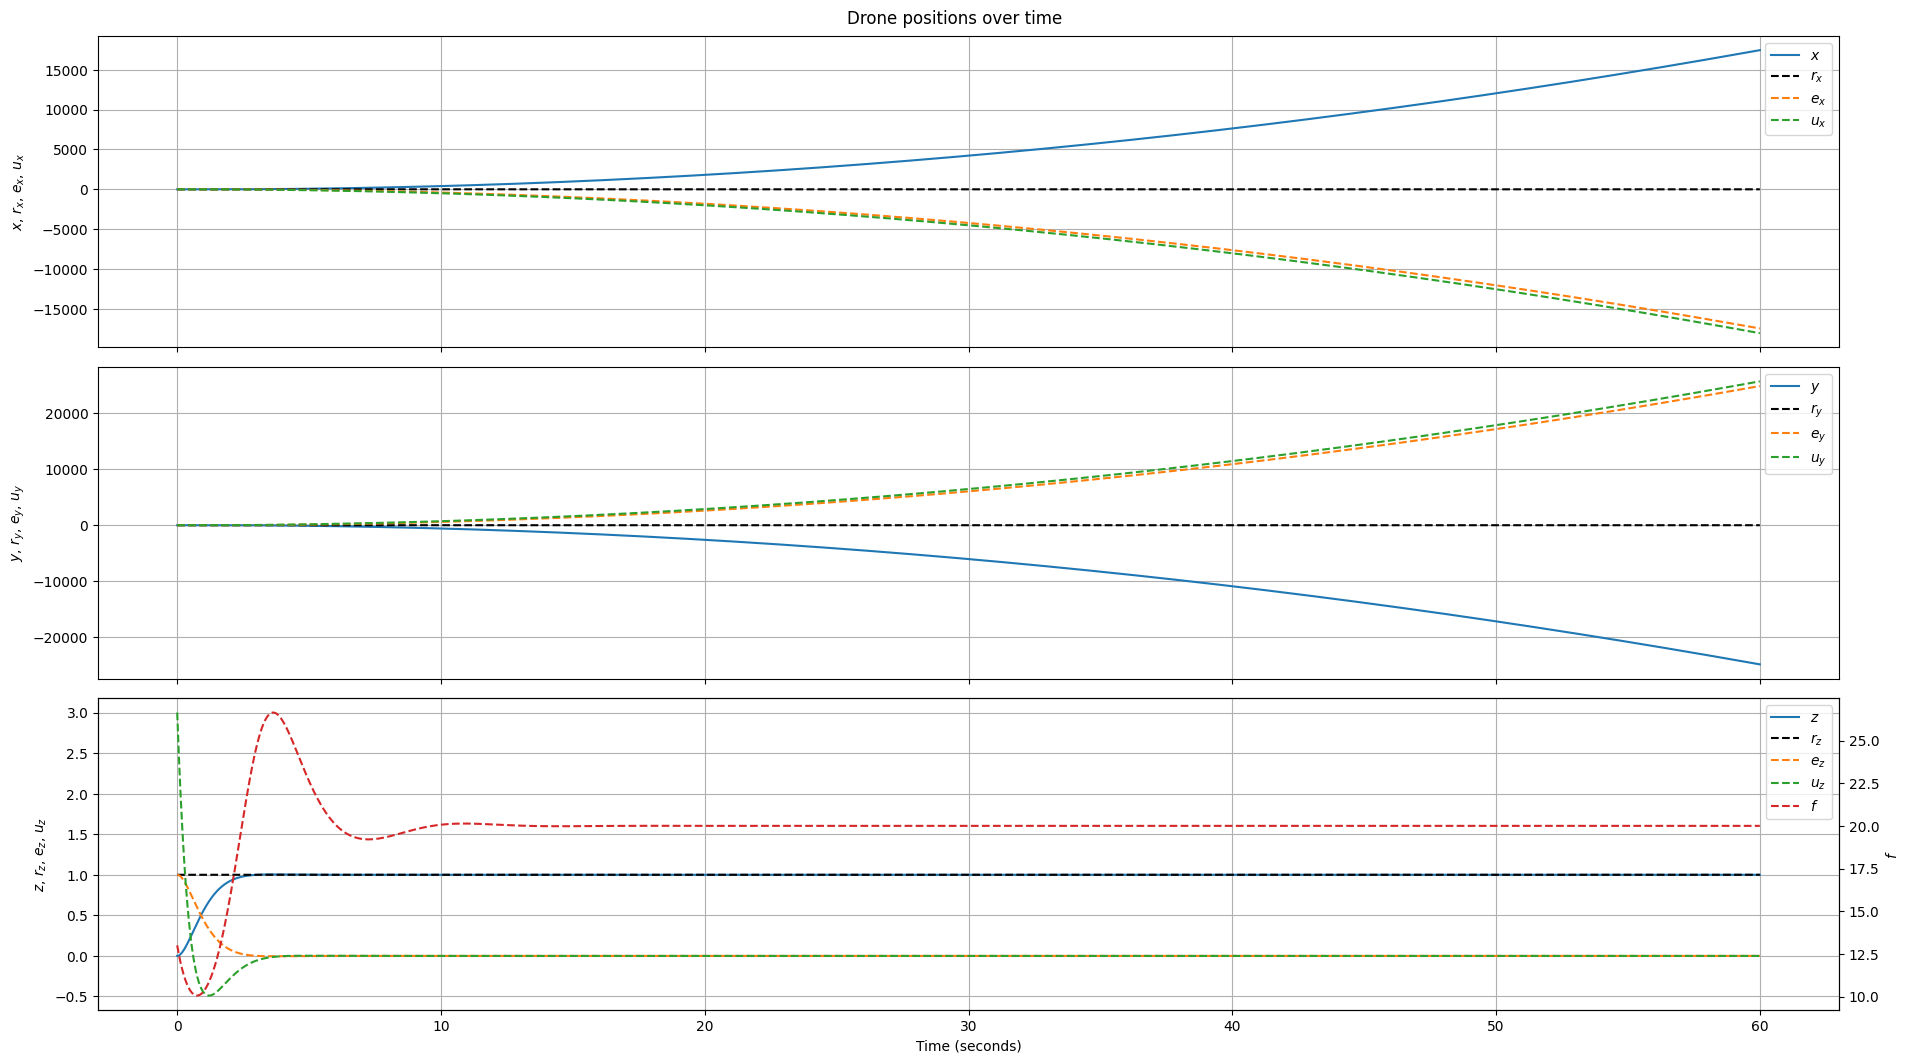

In [27]:
time_plot(['x', 'y', 'z'], sim_out, title='Drone positions over time',
    filename=os.path.join(output_dir, 'positions_over_time.png'))

## Drone directions over time

(<Figure size 1920x1080 with 6 Axes>,
 array([<AxesSubplot: ylabel='$\\phi$, $r_{\\phi}$, $e_{\\phi}$, $u_{\\phi}$'>,
        <AxesSubplot: ylabel='$\\theta$, $r_{\\theta}$, $e_{\\theta}$, $u_{\\theta}$'>,
        <AxesSubplot: xlabel='Time (seconds)', ylabel='$\\psi$, $r_{\\psi}$, $e_{\\psi}$, $u_{\\psi}$'>],
       dtype=object))

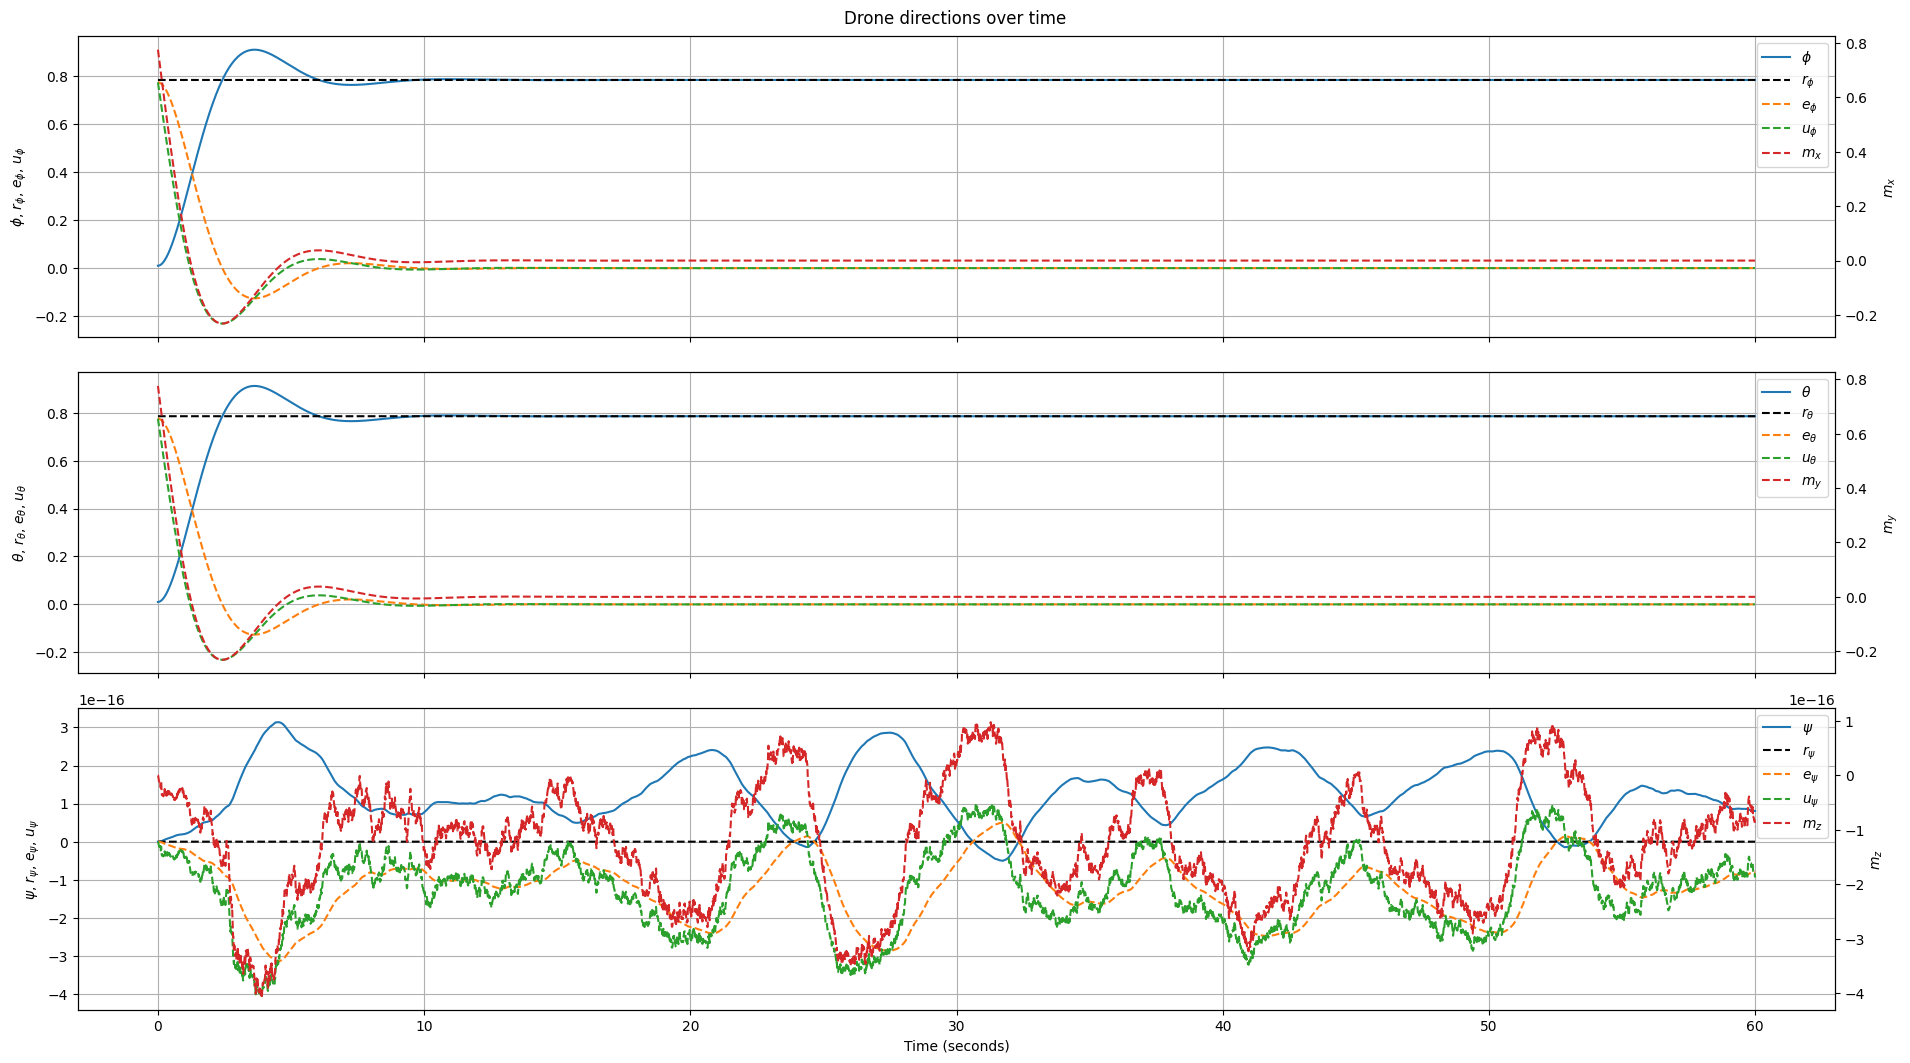

In [48]:
time_plot(['phi', 'theta', 'psi'], sim_out, title='Drone directions over time',
    filename=os.path.join(output_dir, 'directions_over_time.png'))

## Drone diff positions over time

(<Figure size 1920x1080 with 3 Axes>,
 array([<AxesSubplot: ylabel='$dx$, $r_{dx}$, $e_{dx}$'>,
        <AxesSubplot: ylabel='$dy$, $r_{dy}$, $e_{dy}$'>,
        <AxesSubplot: xlabel='Time (seconds)', ylabel='$dz$, $r_{dz}$'>],
       dtype=object))

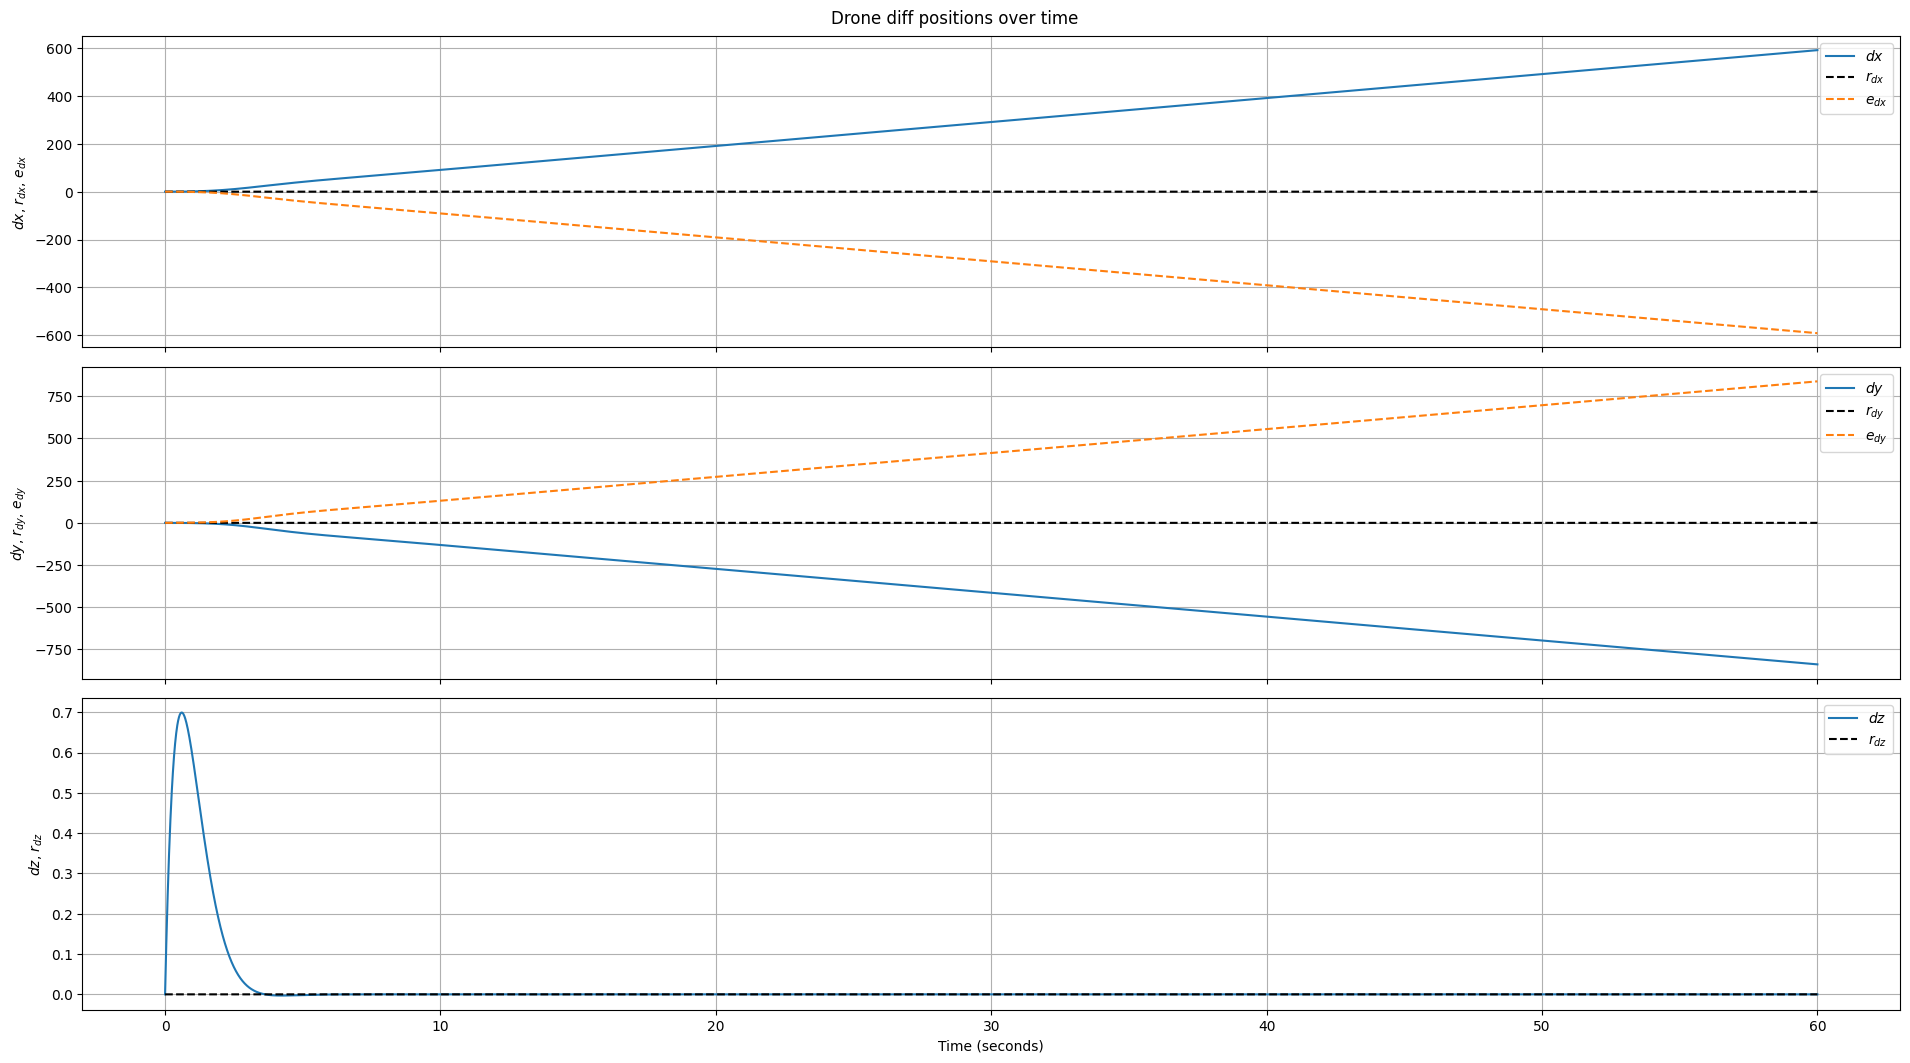

In [49]:
time_plot(['dx', 'dy', 'dz'], sim_out, title='Drone diff positions over time',
    filename=os.path.join(output_dir, 'diff_positions_over_time.png'))

## Drone diff directions over time

(<Figure size 1920x1080 with 3 Axes>,
 array([<AxesSubplot: ylabel='$d\\phi$, $r_{d\\phi}$, $e_{d\\phi}$'>,
        <AxesSubplot: ylabel='$d\\theta$, $r_{d\\theta}$, $e_{d\\theta}$'>,
        <AxesSubplot: xlabel='Time (seconds)', ylabel='$d\\psi$, $r_{d\\psi}$'>],
       dtype=object))

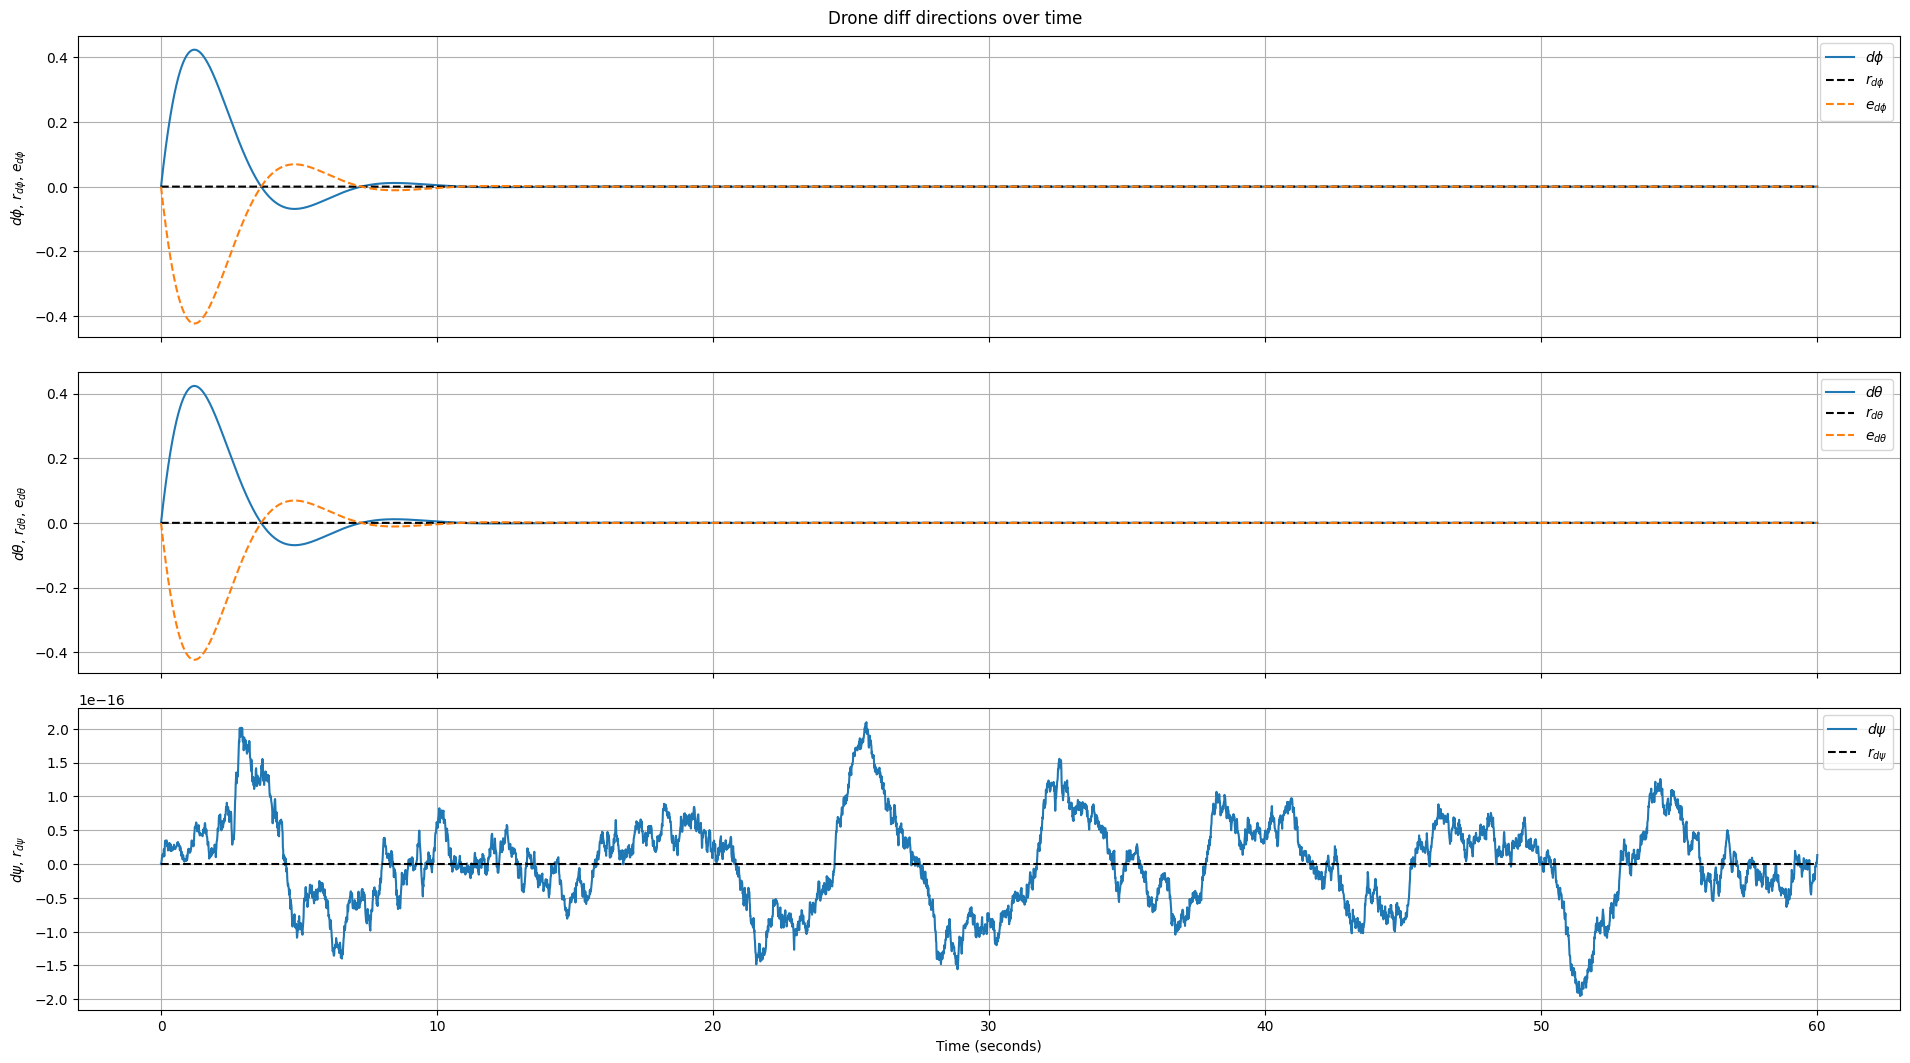

In [50]:
time_plot(['dphi', 'dtheta', 'dpsi'], sim_out, title='Drone diff directions over time',
    filename=os.path.join(output_dir, 'diff_directions_over_time.png'))

## Feedback Linearized Inputs

(<Figure size 1920x1080 with 4 Axes>,
 array([<AxesSubplot: ylabel='$f$'>, <AxesSubplot: ylabel='$m_x$'>,
        <AxesSubplot: ylabel='$m_y$'>,
        <AxesSubplot: xlabel='Time (seconds)', ylabel='$m_z$'>],
       dtype=object))

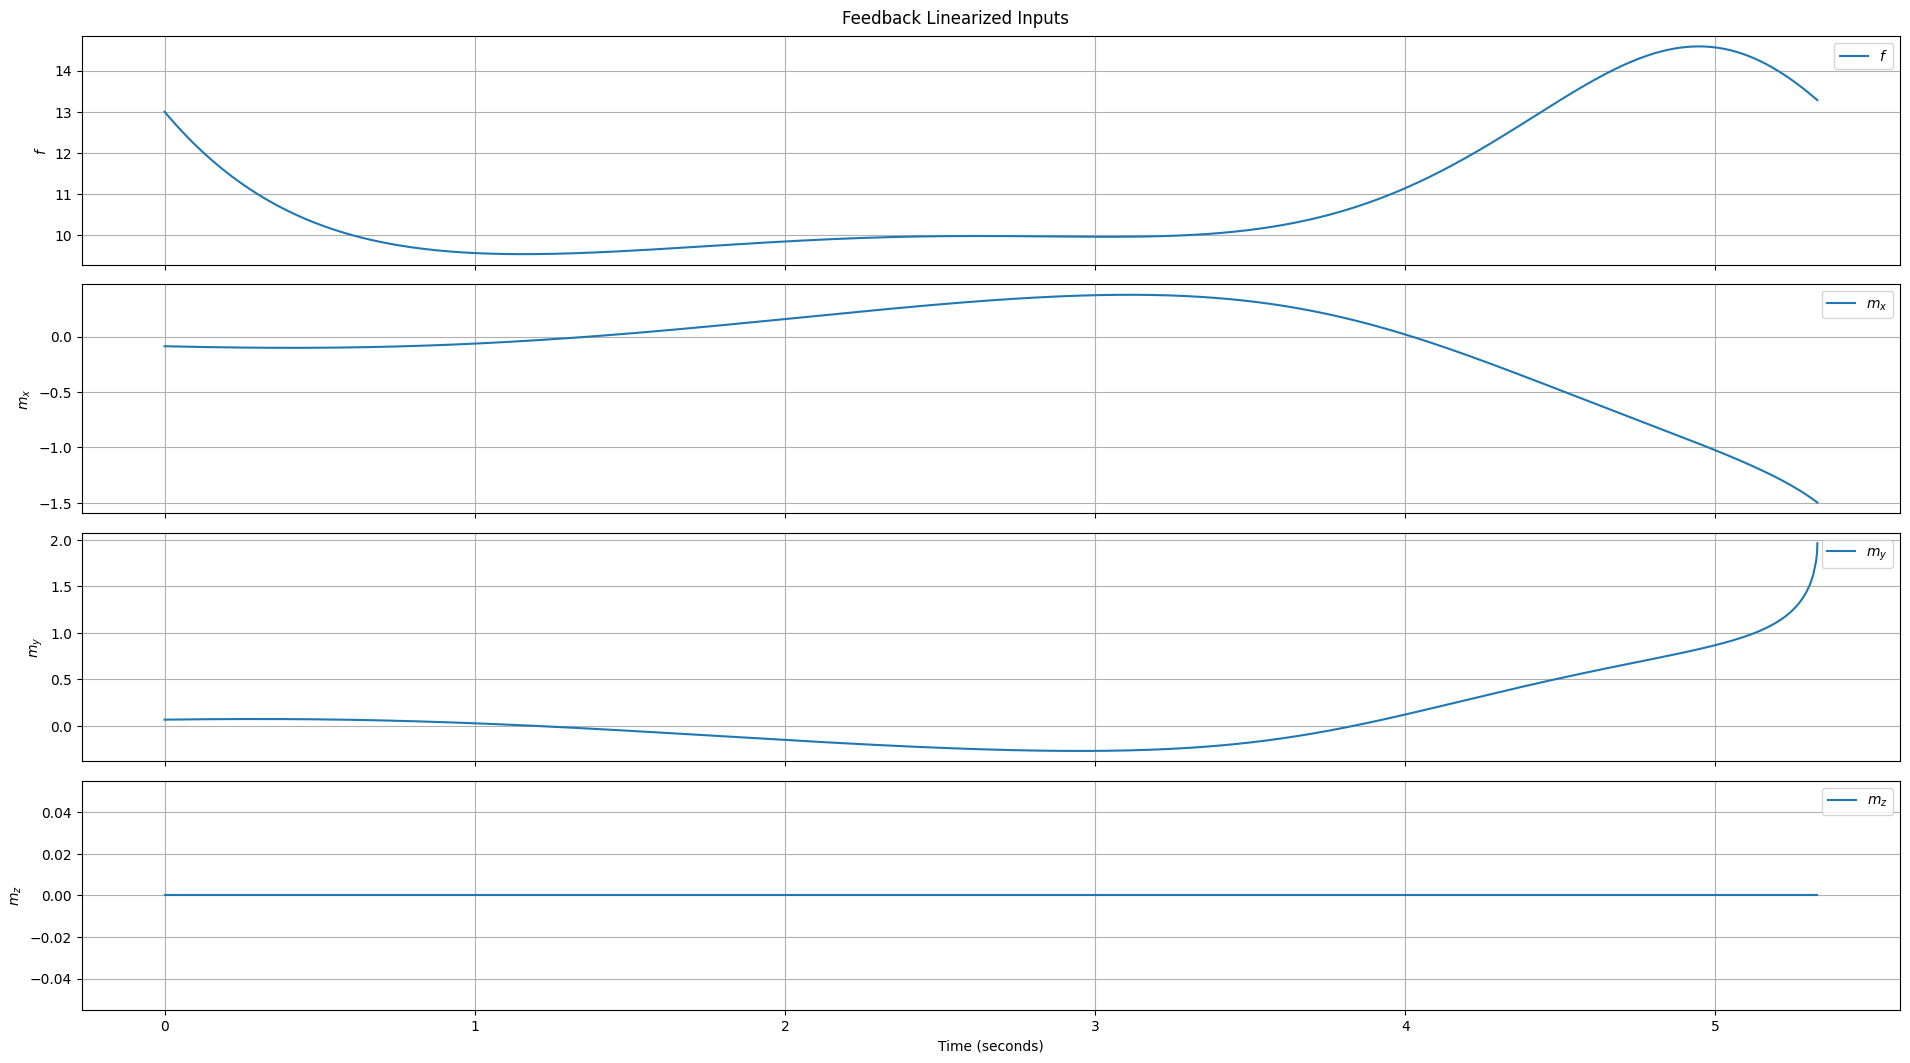

In [11]:
time_plot(['f', 'm_x', 'm_y', 'm_z'], sim_out, title='Feedback Linearized Inputs',
    filename=os.path.join(output_dir, 'linearized_inputs_over_time.png'))

## State space plots

(<Figure size 1920x1080 with 1 Axes>, <AxesSubplot: xlabel='x', ylabel='y'>)

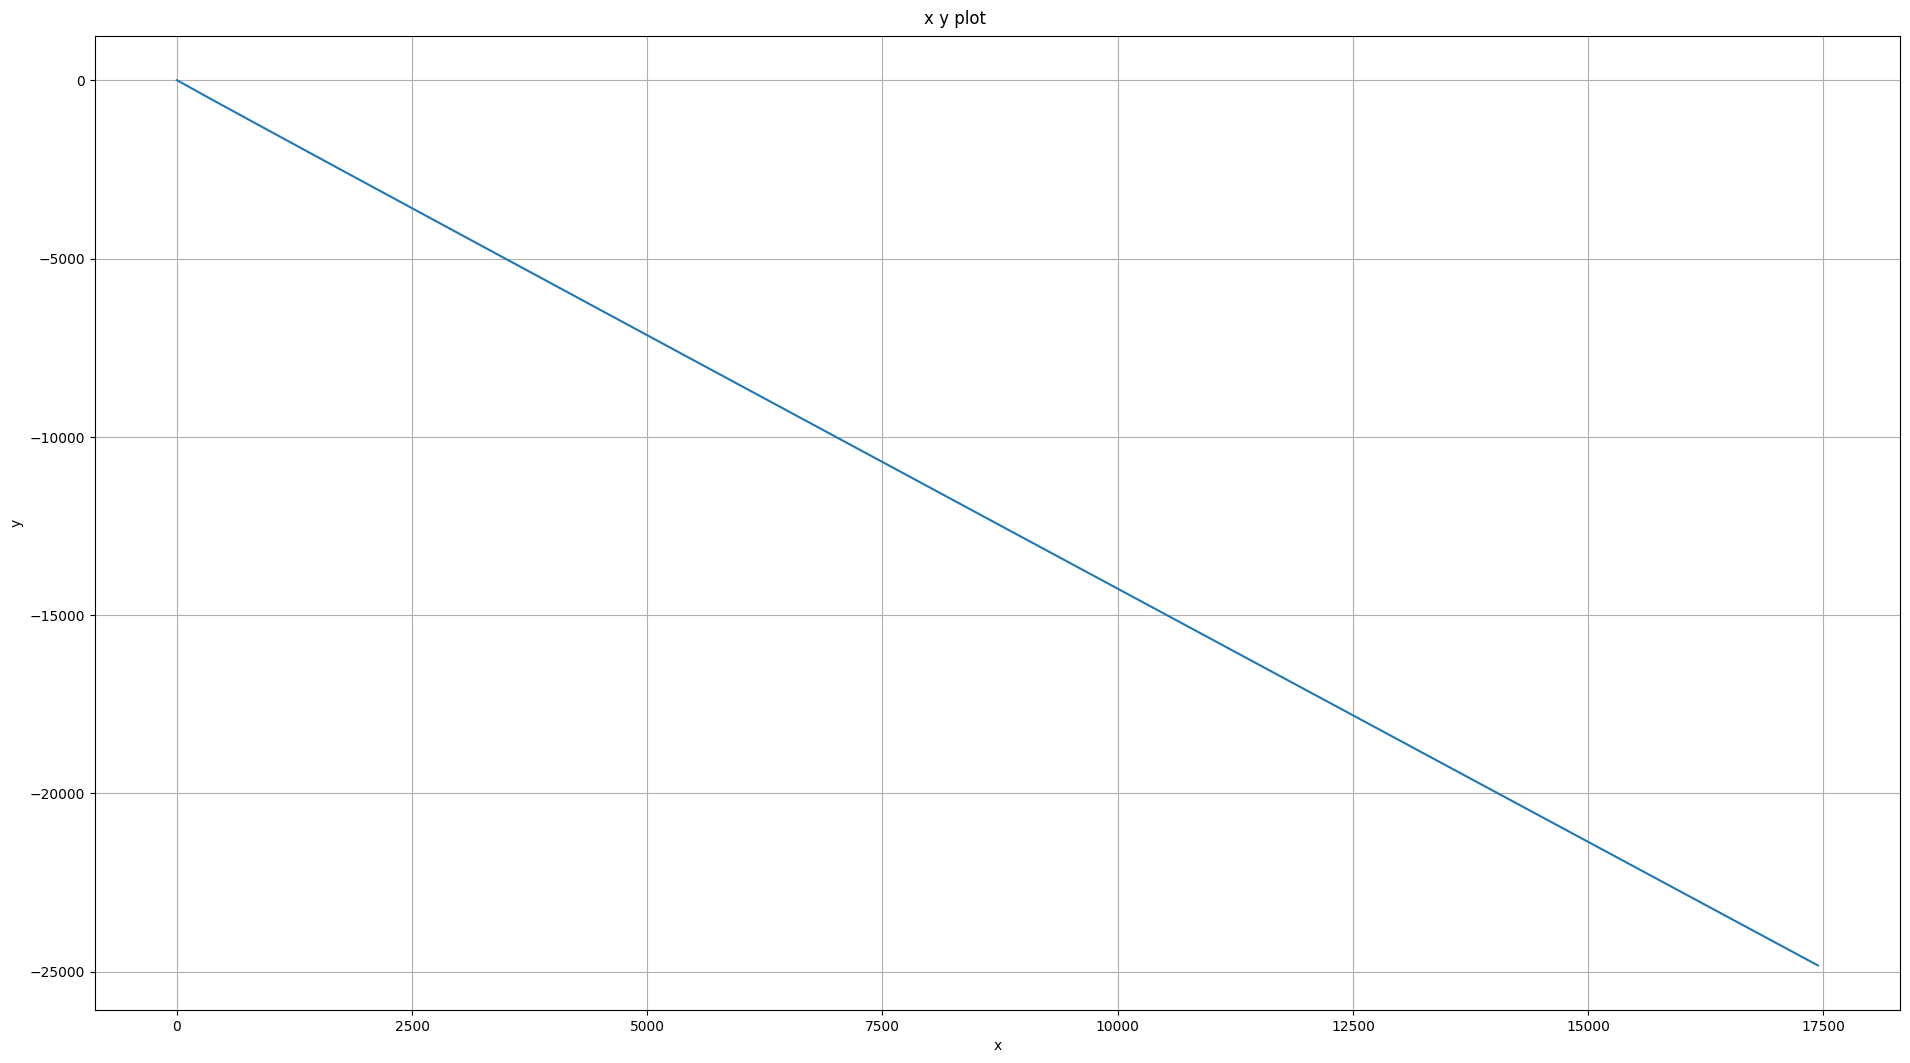

In [51]:
x='x'
y='y'
state_space_plot(x,y,sim_out, title=f'{x} {y} plot',
    filename=os.path.join(output_dir, f'{x}_{y}_plot.png'))

In [10]:
from dynamo.drone import get_ref_phi, get_ref_theta, get_refs
from dynamo.mechanics import get_2d_rot_inv_matrix

# psi = np.random.uniform(-np.pi/2.5, np.pi/2.5, size=10000)
# ux = np.random.uniform(-10, 10, size=10000)
# uy = np.random.uniform(-10, 10, size=10000)
mass = np.full(shape=sim_out.shape[0], fill_value=1)
f = sim_out['f'].values

ref_phi = get_ref_phi(sim_out['u_x'], sim_out['u_x'], sim_out['psi'], sim_out['f'], mass)
ref_theta = get_ref_theta(sim_out['u_x'], sim_out['u_y'], sim_out['psi'], ref_phi, sim_out['f'], mass)
# rpsi_inv = get_2d_rot_inv_matrix(sim_out['psi'])
# u = np.array([sim_out['u_x'], sim_out['u_x']])
# mat_prod = (rpsi_inv * u).sum(axis=1)
# aux = mat_prod*(mass.reshape(1,-1)/f.reshape(1,-1))
# new_ref_phi = -np.arcsin(aux[1])
# cphi = np.cos(new_ref_phi)
# new_ref_theta = np.arcsin(aux[0]/cphi)
#new_ref_phi, new_ref_theta = get_refs(sim_out['u_x'], sim_out['u_y'], sim_out['psi'], sim_out['f'], mass)

In [88]:
aux.shape

(2, 6003)

In [83]:
mat_prod

array([[ 1.00000000e+00,  9.99947756e-01,  9.99424816e-01, ...,
        -1.80231011e+04, -1.80291081e+04, -1.80324603e+04],
       [ 1.00000000e+00,  9.99947756e-01,  9.99424816e-01, ...,
        -1.80231011e+04, -1.80291081e+04, -1.80324603e+04]])

In [9]:
np.isclose(new_ref_phi,ref_phi, atol=1e-4).all()

False

In [87]:
ref_phi.shape, new_ref_phi.shape

((6003,), (6003,))

In [67]:
mat_prod.shape

(2, 6003)